In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv("./train_data.csv")

In [211]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [212]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [213]:
df.shape

(3499, 13)

In [214]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 22
Power                  22
Seats                  25
New_Price            3018
Price                   0
dtype: int64

In [215]:
# df["Engine"] = df[df["Engine"].notna()]
# df["Power"] = df[df["Power"].notna()]
# df["Seats"] = df[df["Seats"].notna()]

df=df.dropna(subset=["Engine", "Power", "Seats"])

In [216]:
df = df.drop("New_Price", axis='columns')

In [217]:
df.shape

(3474, 12)

### -------------

In [218]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [219]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [220]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

### ---------

In [221]:
df["Mileage"]

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
3494    22.32 kmpl
3495     18.9 kmpl
3496    24.52 kmpl
3497     24.4 kmpl
3498     22.9 kmpl
Name: Mileage, Length: 3474, dtype: object

In [222]:
count_kmkg = 0
count_kmpl = 0
for i in df["Mileage"]:
    if "km/kg" in str(i):
        count_kmkg += 1
    elif "kmpl" in str(i):
        count_kmpl += 1
print('The no of rows with km/kg: ', count_kmkg)
print('The no of rows with kmpl: ', count_kmpl)

The no of rows with km/kg:  42
The no of rows with kmpl:  3432


<b>Formula: 1 kmpl = 1 km/kg / density

In [223]:
fuel_density = {'CNG': 0.128, 'Diesel': 0.832, 'Petrol': 0.745, 'LPG': 0.579}

Transformed_Mileage = []
for i, fuel_type in zip(df['Mileage'], df['Fuel_Type']):
    if "kmpl" in str(i):
        i = i[:-5]
        i = float(i) / fuel_density[fuel_type]
    elif str(i).endswith('km/kg'):
        i = i[:-6]
    Transformed_Mileage.append(float(i))

In [224]:
df["Mileage"] = Transformed_Mileage

In [225]:
df['Engine'] = df['Engine'].str.replace(' CC', '')       
df['Engine'] = df['Engine'].astype('float64')

In [226]:
df['Power'] = df['Power'].str.replace(' bhp', '')    

In [227]:
df['Power'] = df['Power'].replace('null', np.nan)
df['Power'] = df['Power'].astype('float64')

In [228]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,23.641827,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,24.429530,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,24.963942,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,18.269231,1968.0,140.80,5.0,17.74


### ------------------

<AxesSubplot:xlabel='Price', ylabel='Count'>

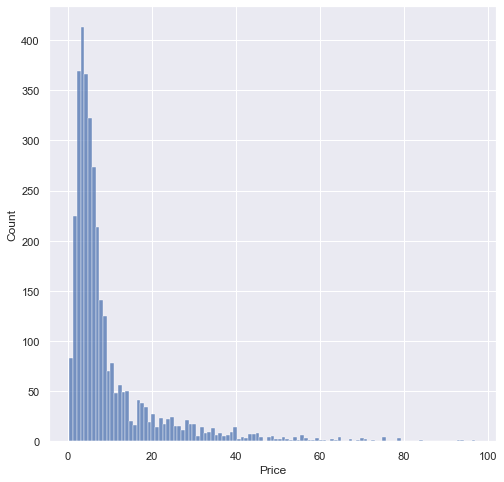

In [230]:
f, ax = plt.subplots(figsize=(8,8))
sns.histplot(df['Price'])

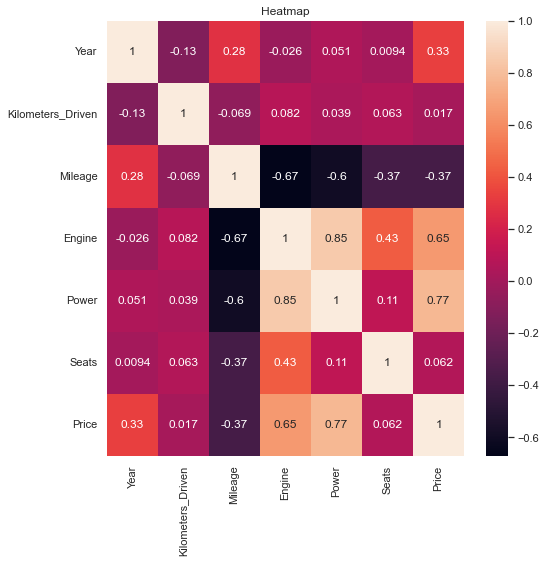

In [235]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

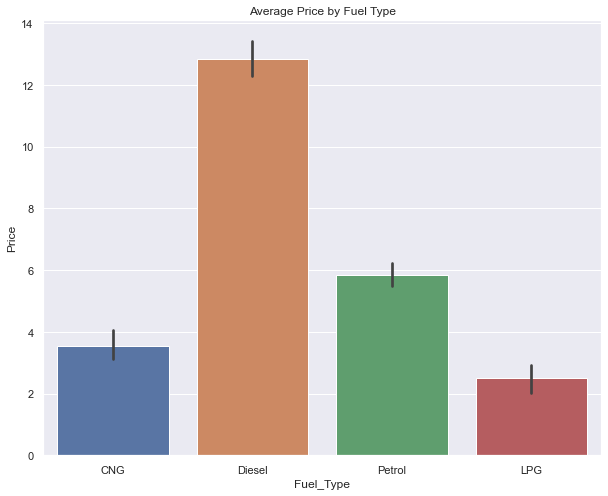

In [240]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Fuel_Type', y='Price', data=df)
plt.title('Average Price by Fuel Type')
plt.show()

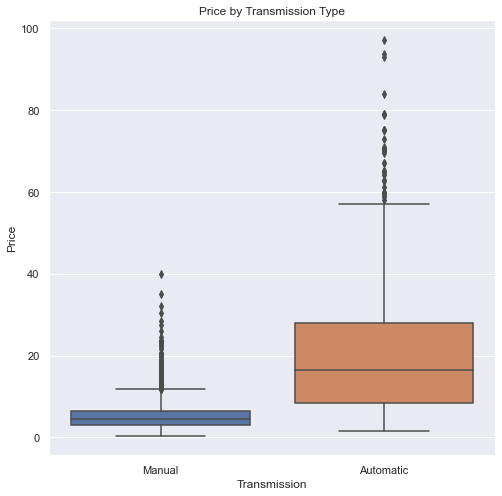

In [246]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Price by Transmission Type')
plt.show()

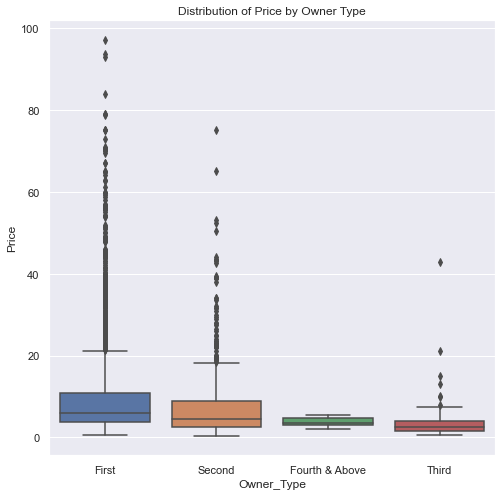

In [247]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="Owner_Type", y="Price", data=df)
plt.title("Distribution of Price by Owner Type")
plt.show()

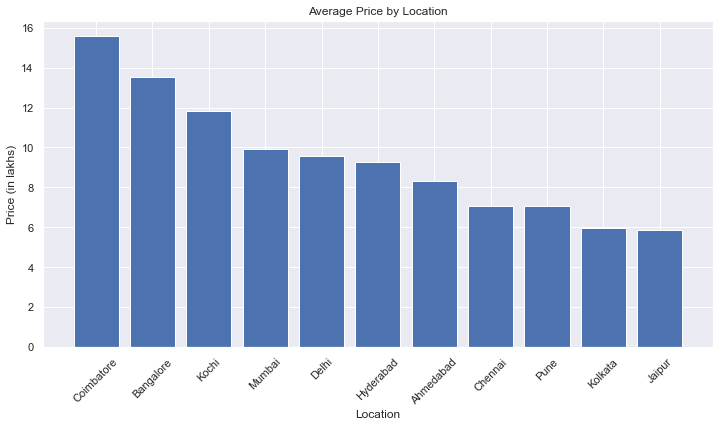

In [249]:
import matplotlib.pyplot as plt

price_by_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(price_by_location.index, price_by_location.values)
plt.xticks(rotation=45)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Price (in lakhs)')
plt.show()

### -------------------------

In [253]:
df = df.drop("Name", axis='columns')

In [254]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [255]:
df["Location"].value_counts()

Mumbai        472
Hyderabad     411
Coimbatore    376
Kochi         374
Pune          351
Kolkata       323
Delhi         313
Chennai       270
Jaipur        248
Bangalore     209
Ahmedabad     127
Name: Location, dtype: int64

In [258]:
Location = df[["Location"]]
Location = pd.get_dummies(Location,drop_first=True)

In [259]:
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [260]:
df["Fuel_Type"].value_counts()

Diesel    1890
Petrol    1542
CNG         35
LPG          7
Name: Fuel_Type, dtype: int64

In [261]:
Fuel_Type = df[["Fuel_Type"]]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)

In [262]:
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [263]:
df["Transmission"].value_counts()

Manual       2474
Automatic    1000
Name: Transmission, dtype: int64

In [264]:
Transmission = df[["Transmission"]]
Transmission = pd.get_dummies(Transmission,drop_first=True)

In [265]:
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [272]:
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.600000,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,1,23.641827,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,1,24.429530,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,1,24.963942,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,2,18.269231,1968.0,140.80,5.0,17.74


### -------------